In [129]:
# import packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)             # set the number of rows to be displayed
pd.set_option('display.max_columns', 500)          # set the number of columns to be displayed
pd.set_option('display.width', 1000)               # set the width of the column columns

pd.options.display.float_format = '{:.2f}'.format  # format floats as standard notation vs. 
                                                   # scientific notation

In [5]:
# import csv and create dataframe
df = pd.read_csv('kc_house_data.csv')

# inspect dataframe
df.head()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [94]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00,21534.00
mean,4582351016.29,540057.66,3.37,2.12,2079.83,15090.60,1.49,0.01,0.23,3.41,7.66,1788.56,291.27,1971.00,68.87,98077.94,47.56,-122.21,1986.30,12751.08
std,2876779096.96,366059.58,0.93,0.77,917.45,41380.21,0.54,0.08,0.77,0.65,1.17,827.75,442.20,29.38,364.31,53.51,0.14,0.14,685.12,27255.48
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123212130.25,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904945195.00,450000.00,3.00,2.25,1910.00,7617.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7312175032.50,645000.00,4.00,2.50,2550.00,10687.75,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


## Some Data Cleaning

In [73]:
# some values in the sqft_basement column were set to '?'
# I'm going to set the '?' to 0 in order to convert the
# the datatype to integer. I am then going to subtract
# sqft_above from sqft_living to find the sqft_basement 
# values

df['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        78
1100.0       78
670.0        77
550.0        76
650.0        75
780.0        75
240.0        74
680.0        73
380.0        73
360.0        71
910.0        71
850.0        71
770.0        71
940.0        71
1200.0       69
440.0        69
290.0        69
520.0        68
880.0        68
350.0        67
630.0        66
920.0        66
960.0        65
740.0        64
730.0        64
430.0        64
760.0        63
640.0        63
1010.0       63
340.0        62
560.0        62
570.0        62
280.0        62
950.0        61
460.0        60
790.0        60
820.0        60
310.0        58
1060.0       58
980.0        57
830.0        55
1040.0       55
540.0   

In [72]:
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,3,8,2780,?,1900,0.0,98117,47.6981,-122.368,1830,6350
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,0.0,0.0,3,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,0.0,0.0,5,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,3,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,4,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538


In [75]:
len(df[df['sqft_basement'] == '?'])

452

In [78]:
# replace '?' with 0
df['sqft_basement'].replace('?', 0, inplace = True) 

In [79]:
# confirm replacement
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [82]:
# sqft_basement datatype is set as an object and needs to be re-typed as float

df['sqft_basement'] = df['sqft_basement'].astype('float') 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 4.2+ MB


In [84]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

## Handling Missing Values

In [9]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### exploring yr_renovated values

In [10]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
1996.0       11
1988.0       11
1970.0        9
2011.0        9
1980.0        8
1982.0        8
2012.0        8
1979.0        7
1977.0        7
1968.0        7
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0  

In [11]:
print(20853/21597*100) # percentage never renovated (year 0.0 value)
print(3842/21597*100) # percentage of null values

96.55507709404084
17.78950780200954


In [12]:
# 97% of the observations are showing that the property has never been renovated
# I'm going to assume that if a property had been renovated, that would be properly noted
# and that null values actually represent no renovation. 

# convert yr_renovated missing values to 0.0
df['yr_renovated'].fillna(0.0, inplace=True)

### exploring waterfront values

In [13]:
# I'm going to assume that if a property is waterfront, that would be properly noted
# and that null values actually represent not waterfront. 

# convert waterfront missing values to 0.0
df['waterfront'].fillna(0.0, inplace=True)

### exploring view values

In [14]:
63/21597*100   # percentage of null values in the view column

0.29170718155299347

In [15]:
# the null values in the view column only make up 0.29% of the total observations so I am going to drop those rows
df = df.dropna(axis=0, subset=['view'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [17]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

In [ ]:
# categorical variables: bedrooms, bathrooms, floors, waterfront, view, condition, grade, zipcode, lat, long
# continuous variables: sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, yr_built

# convert date to a season
# convert waterfront to yes/no binary
# convert view to yes/no binary
# convert yr_renovated to recently/not recently binary

# convert condition below average (1,2), average (3) and above average (4,5)
# convert grade to low (1-3), average (4-10) and high (11-13)

In [24]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

### Handling Outliers

In [135]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.00,33,1.75,1620,6000,1.00,0.00,0.00,5,7,1040,580,1947,0.00,98103,47.69,-122.33,1330,4700


In [136]:
# set value of 33 bedrooms to 3 for one property
df.set_value(15856, 'bedrooms', 3)

/Users/tararosen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,0.00,0.00,3,7,1180,0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0,1933,0.00,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,0.00,0.00,3,8,1530,0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,0.00,0.00,3,8,2310,0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,0.00,0.00,3,7,1020,0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,0.00,0.00,3,8,1600,0,2004,0.00,98027,47.53,-122.07,1410,1287


In [137]:
# confirm new value
df[df['id'] == 2402100895]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.00,3,1.75,1620,6000,1.00,0.00,0.00,5,7,1040,580,1947,0.00,98103,47.69,-122.33,1330,4700


### Correlations

### Visualizations

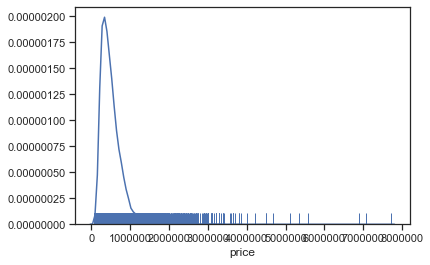

In [128]:
sns.distplot(df['price'], rug = True, hist = False)

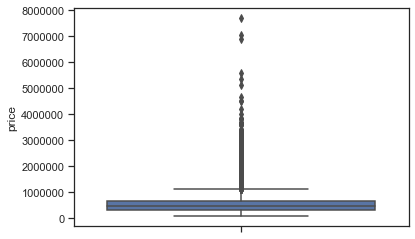

In [101]:
sns.boxplot(df['price'], orient = 'v')

In [95]:
df.loc[df['price'] == 7700000.00]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.00,6,8.00,12050,27600,2.50,0.00,3.00,4,13,8570,3480,1910,1987.00,98102,47.63,-122.32,3940,8800


In [100]:
len(df[df['price'] >= 4000000.00])

11

In [ ]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

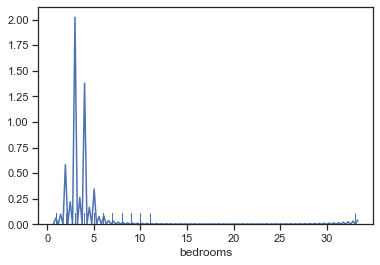

In [127]:
sns.distplot(df['bedrooms'], rug = True, hist = False)

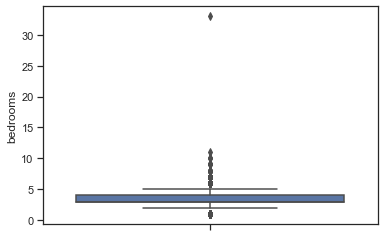

In [49]:
sns.boxplot(df['bedrooms'], orient = "v")

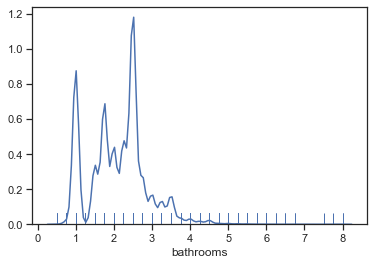

In [126]:
sns.distplot(df['bathrooms'], rug = True, hist = False)

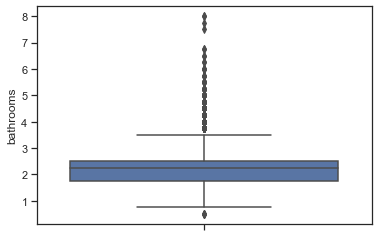

In [50]:
sns.boxplot(df['bathrooms'], orient = "v")

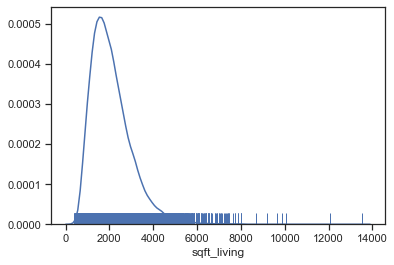

In [125]:
sns.distplot(df['sqft_living'], rug = True, hist = False)

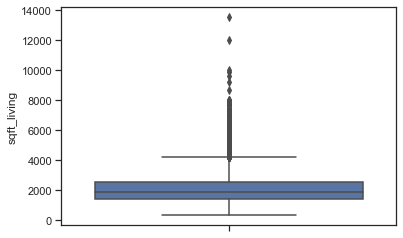

In [51]:
sns.boxplot(df['sqft_living'], orient = "v")

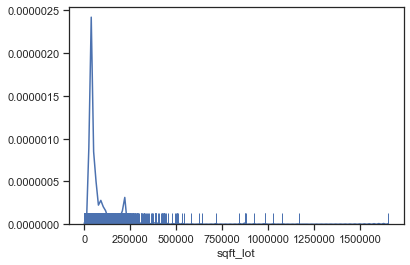

In [124]:
sns.distplot(df['sqft_lot'], rug = True, hist = False)

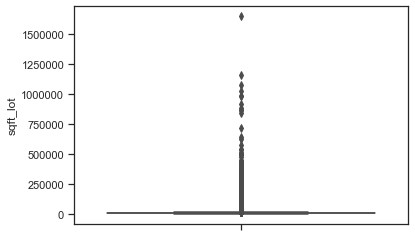

In [52]:
sns.boxplot(df['sqft_lot'], orient = "v")

In [110]:
len(df[df['sqft_lot'] >= 10685])

5386

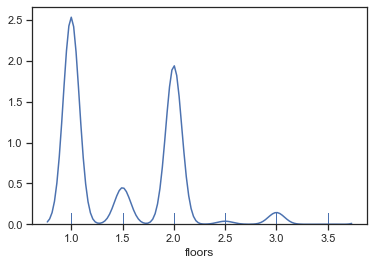

In [111]:
sns.distplot(df['floors'], rug = True, hist=False)

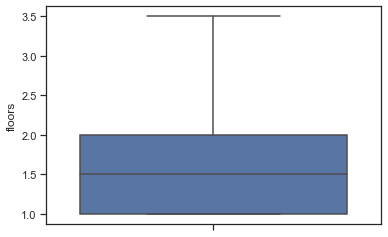

In [53]:
sns.boxplot(df['floors'], orient = "v")

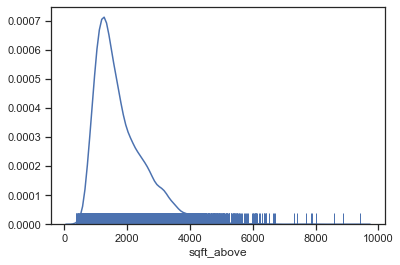

In [112]:
sns.distplot(df['sqft_above'], rug = True, hist=False)

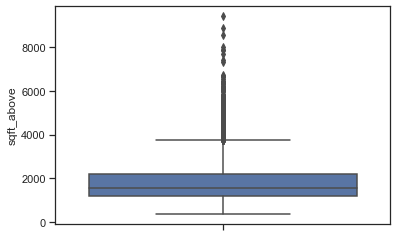

In [56]:
sns.boxplot(df['sqft_above'], orient = "v")

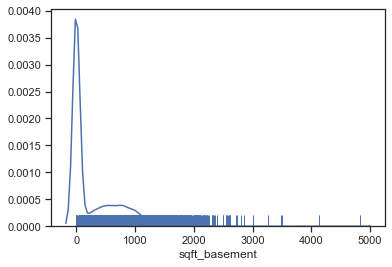

In [115]:
sns.distplot(df['sqft_basement'], rug = True, hist=False)

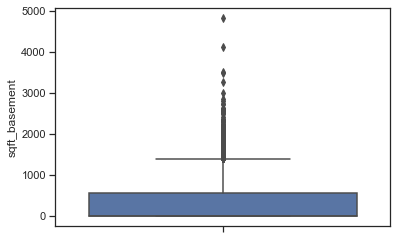

In [86]:
sns.boxplot(df['sqft_basement'], orient = "v")

In [88]:
len(df[df['sqft_basement'] >= 1500])

380

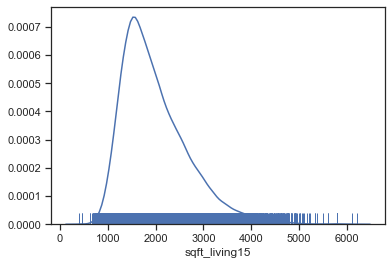

In [116]:
sns.distplot(df['sqft_living15'], rug = True, hist=False)

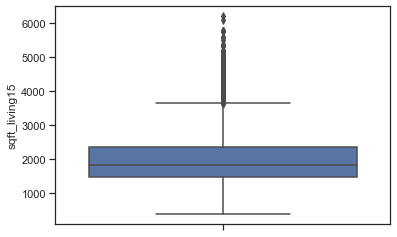

In [58]:
sns.boxplot(df['sqft_living15'], orient = "v")

In [89]:
len(df[df['sqft_living15'] >= 3800])

408

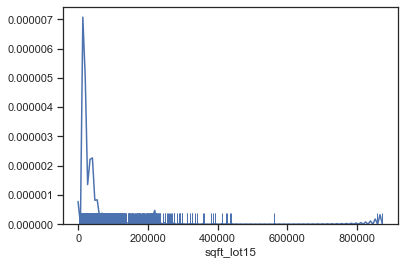

In [117]:
sns.distplot(df['sqft_lot15'], rug = True, hist=False)

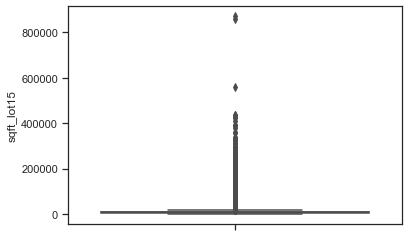

In [59]:
sns.boxplot(df['sqft_lot15'], orient = "v")

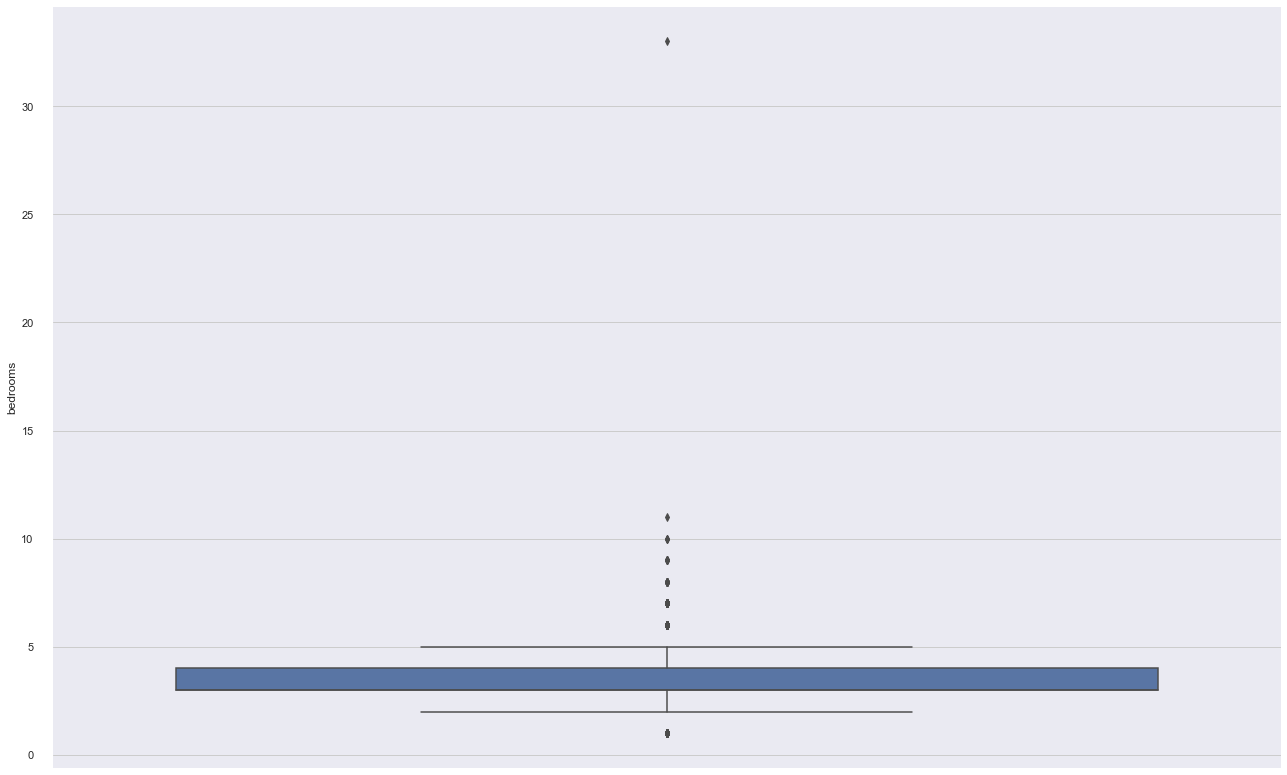

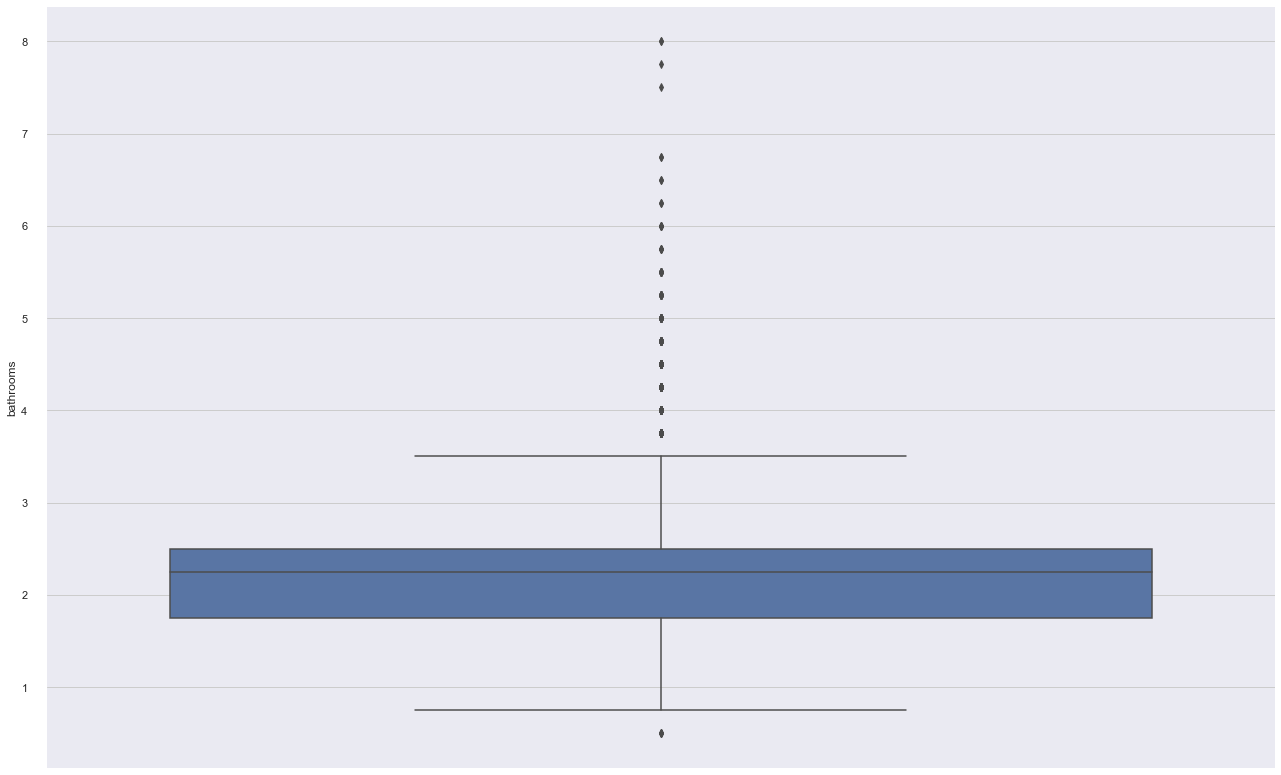

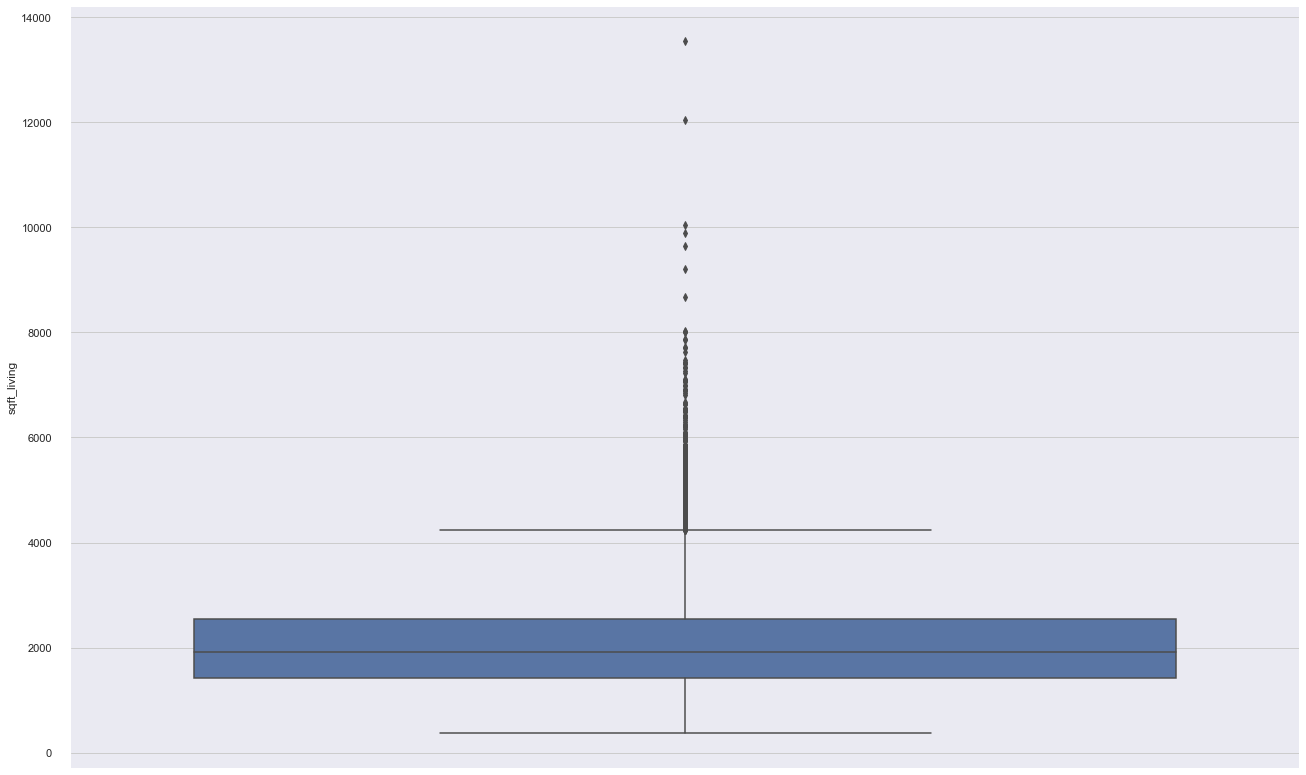

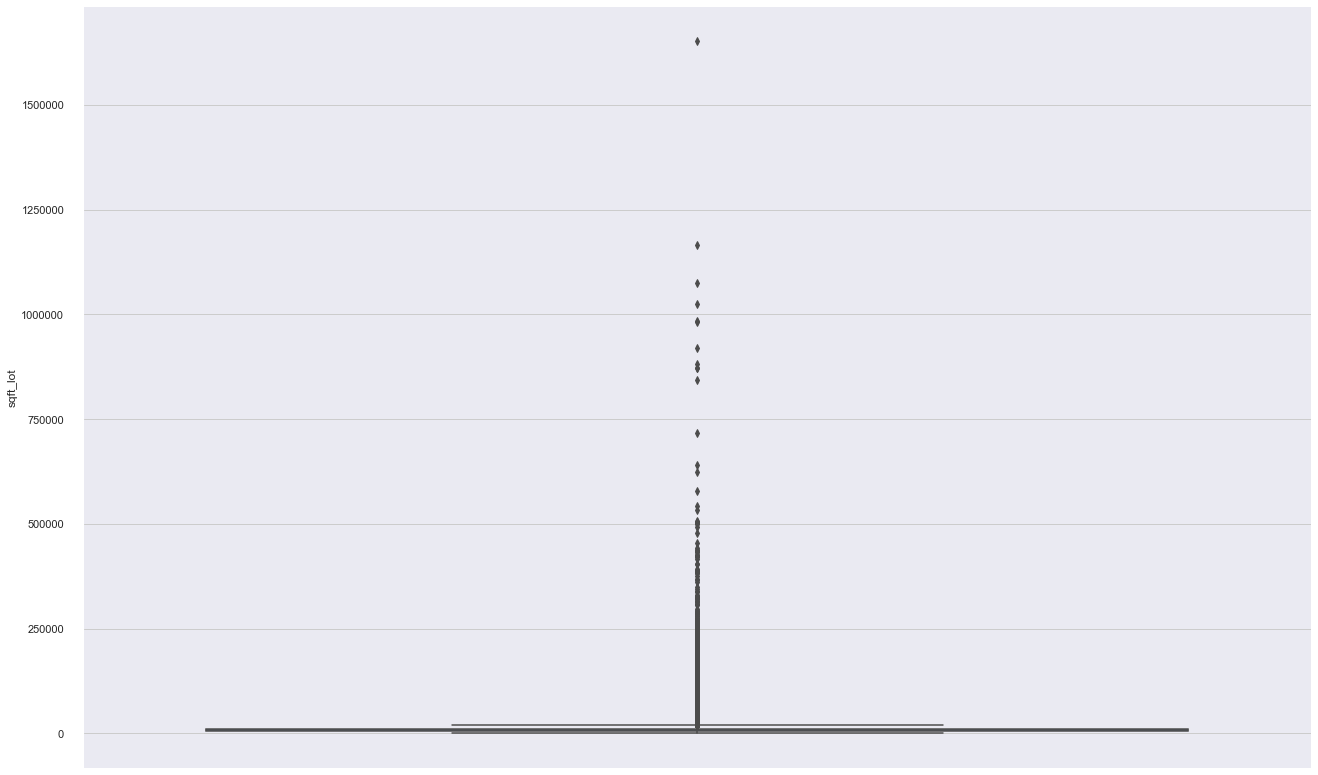

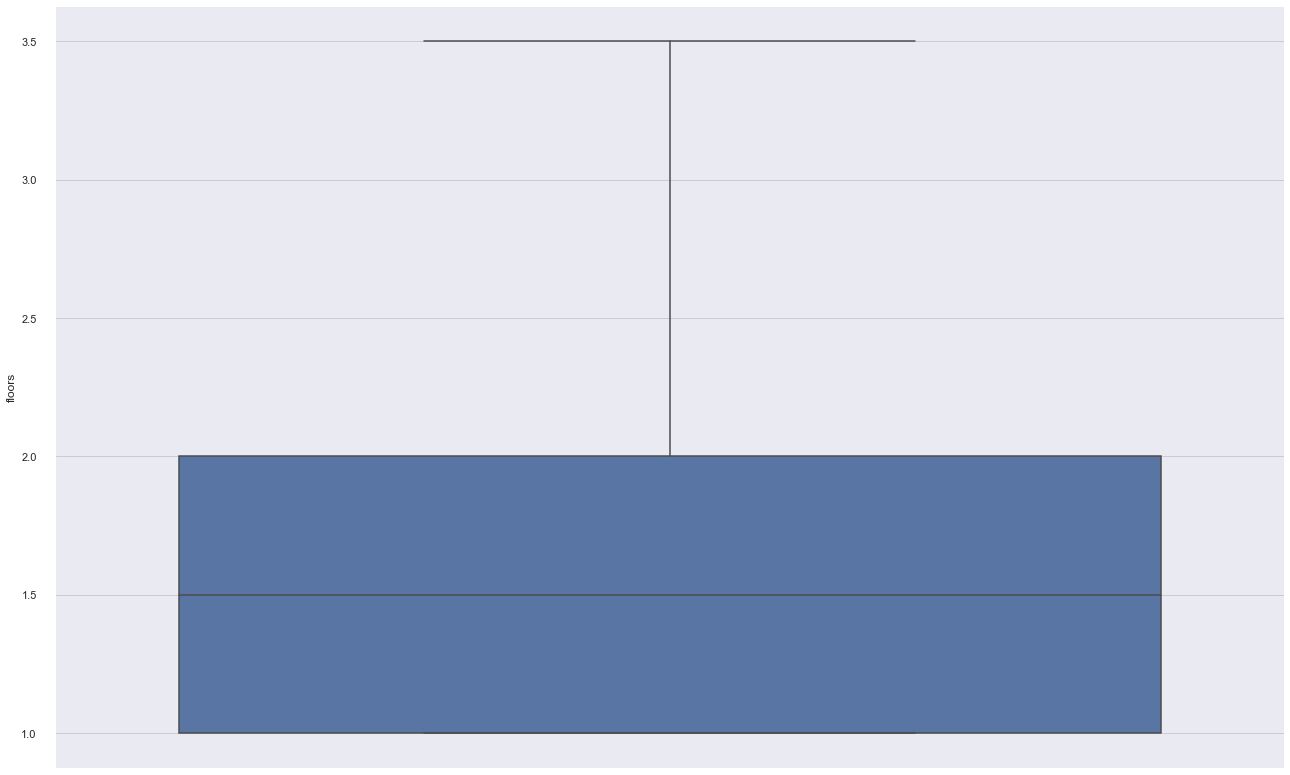

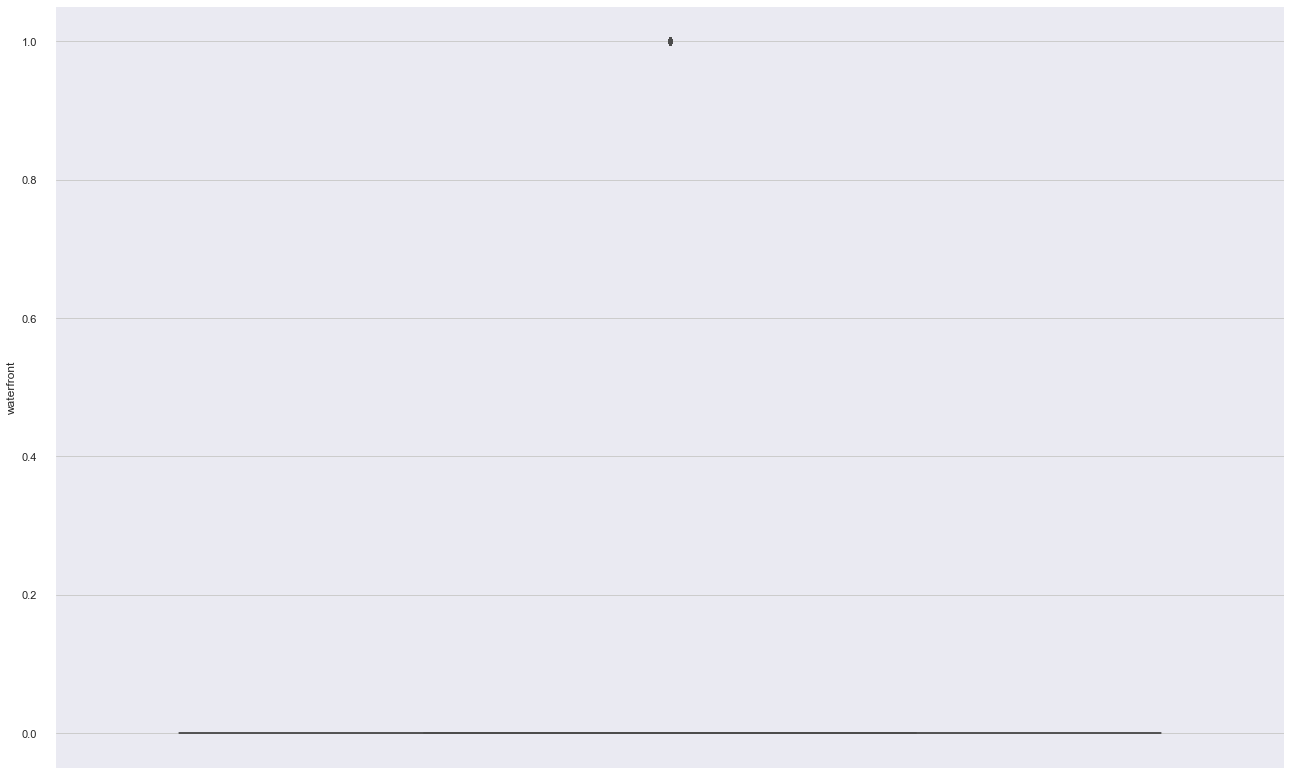

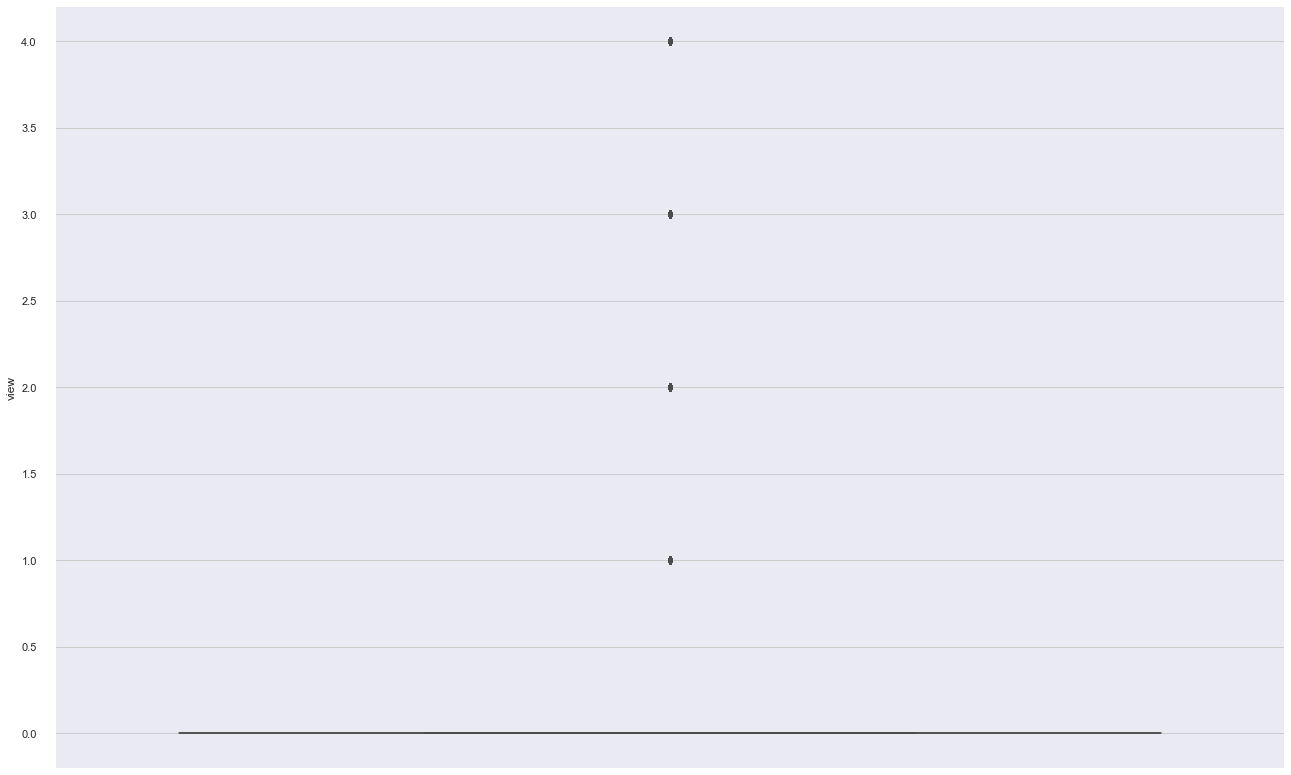

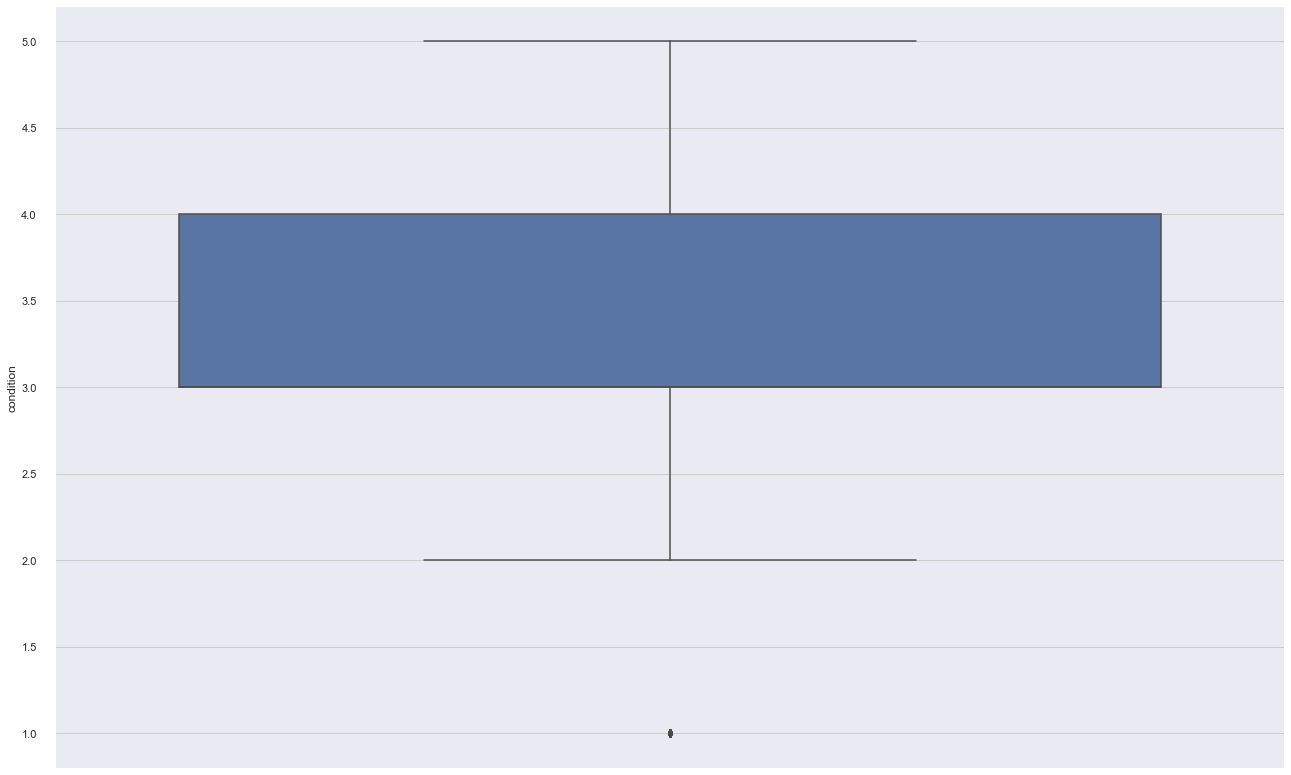

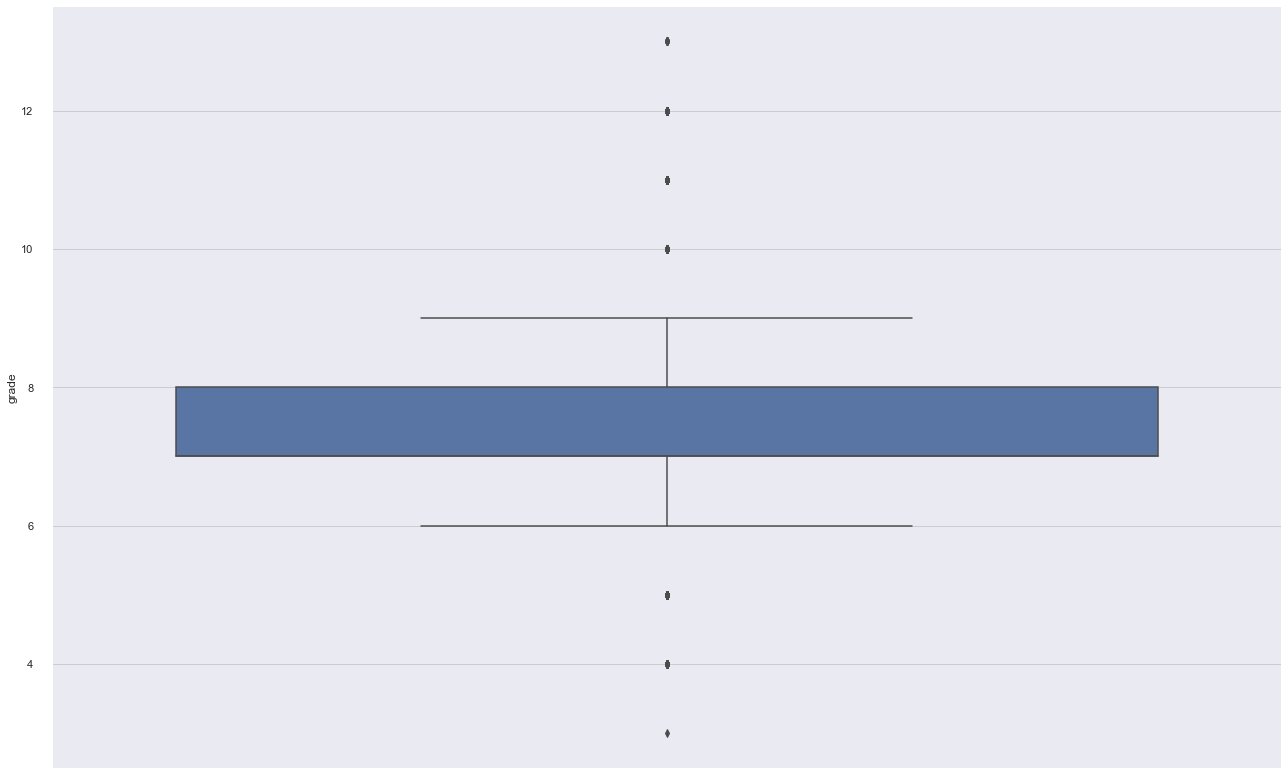

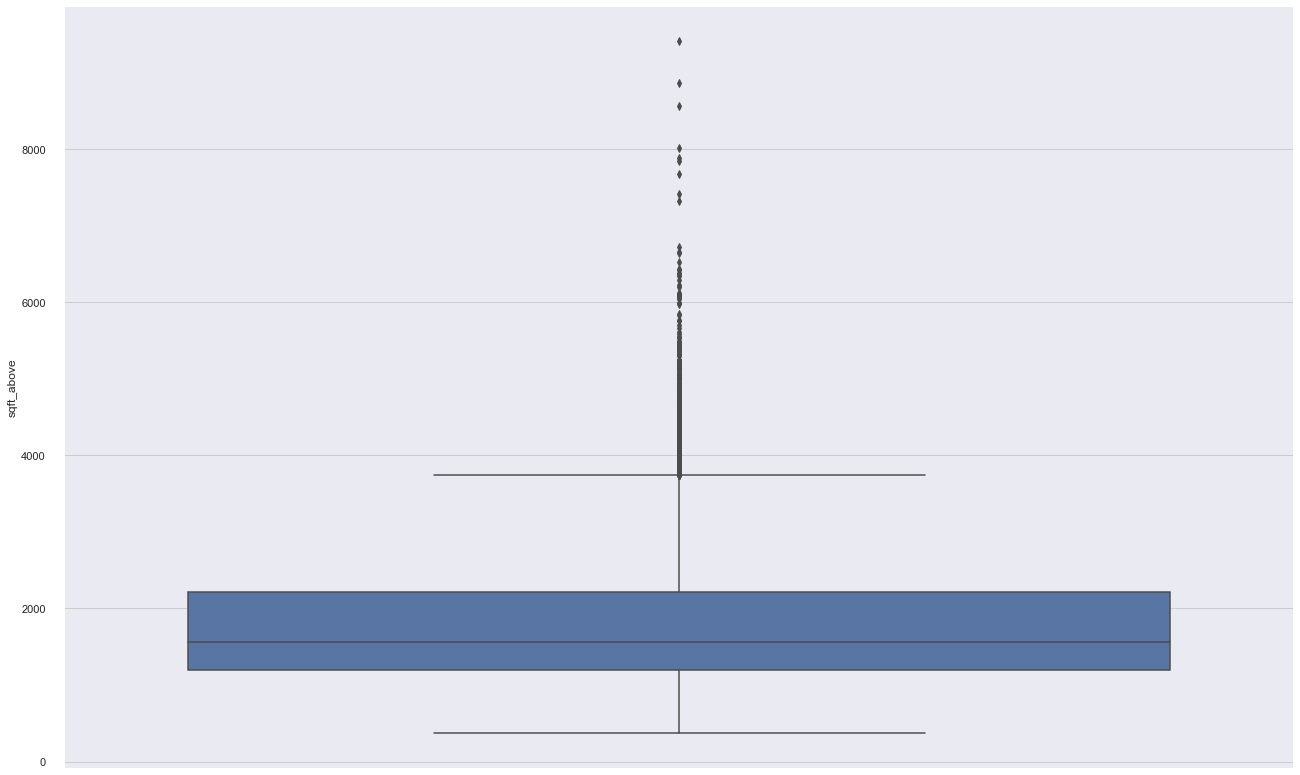

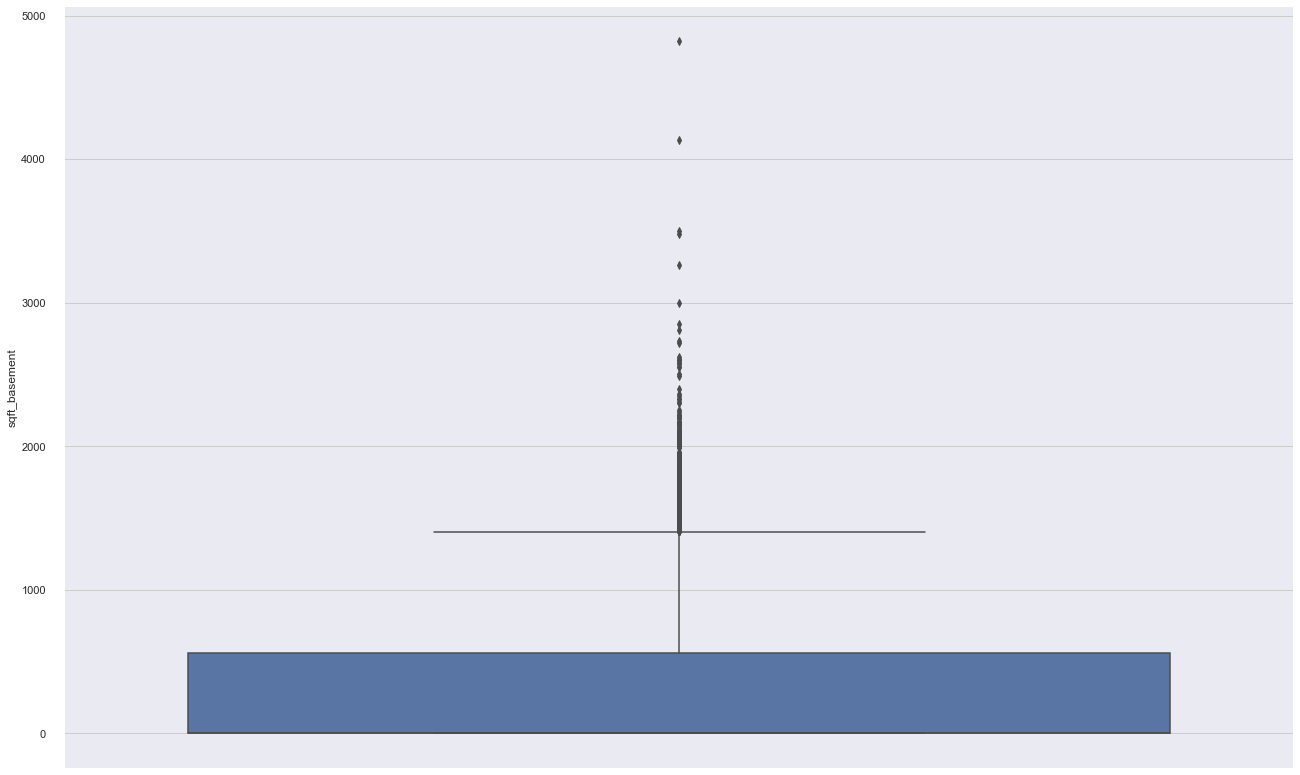

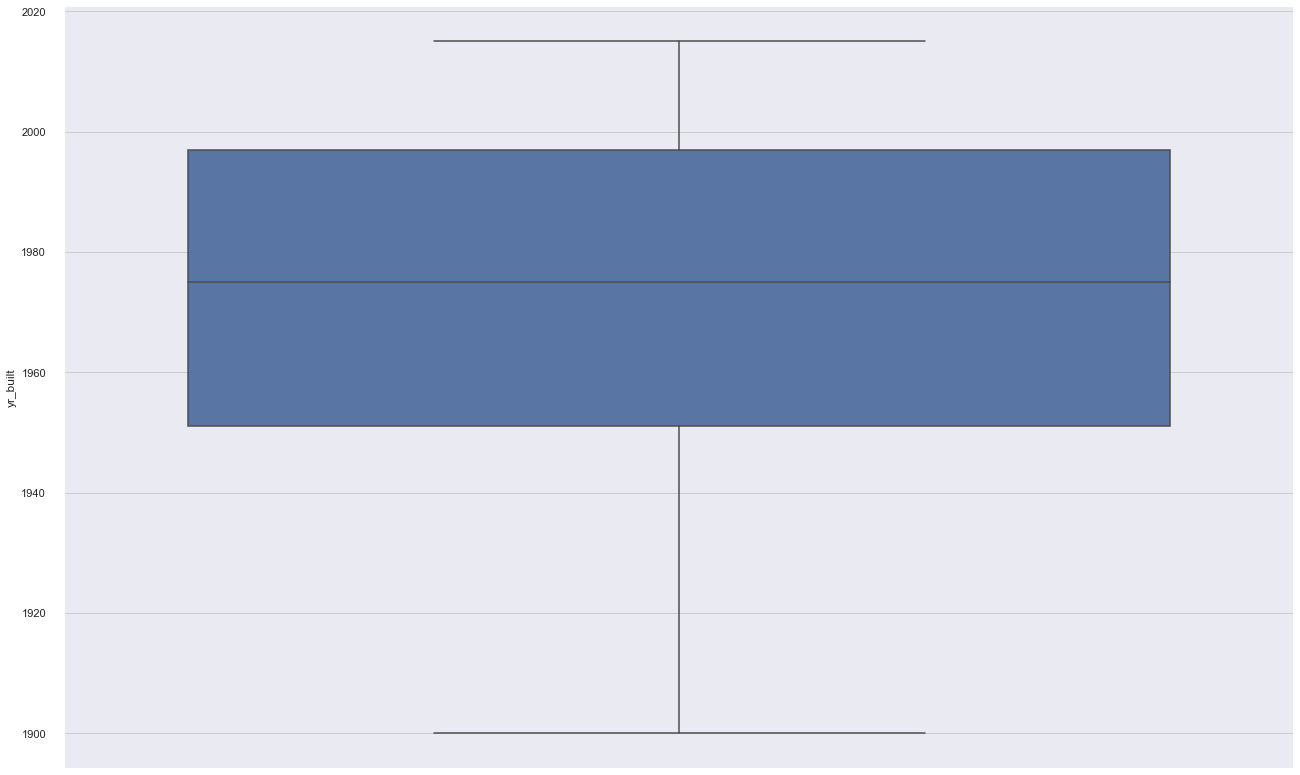

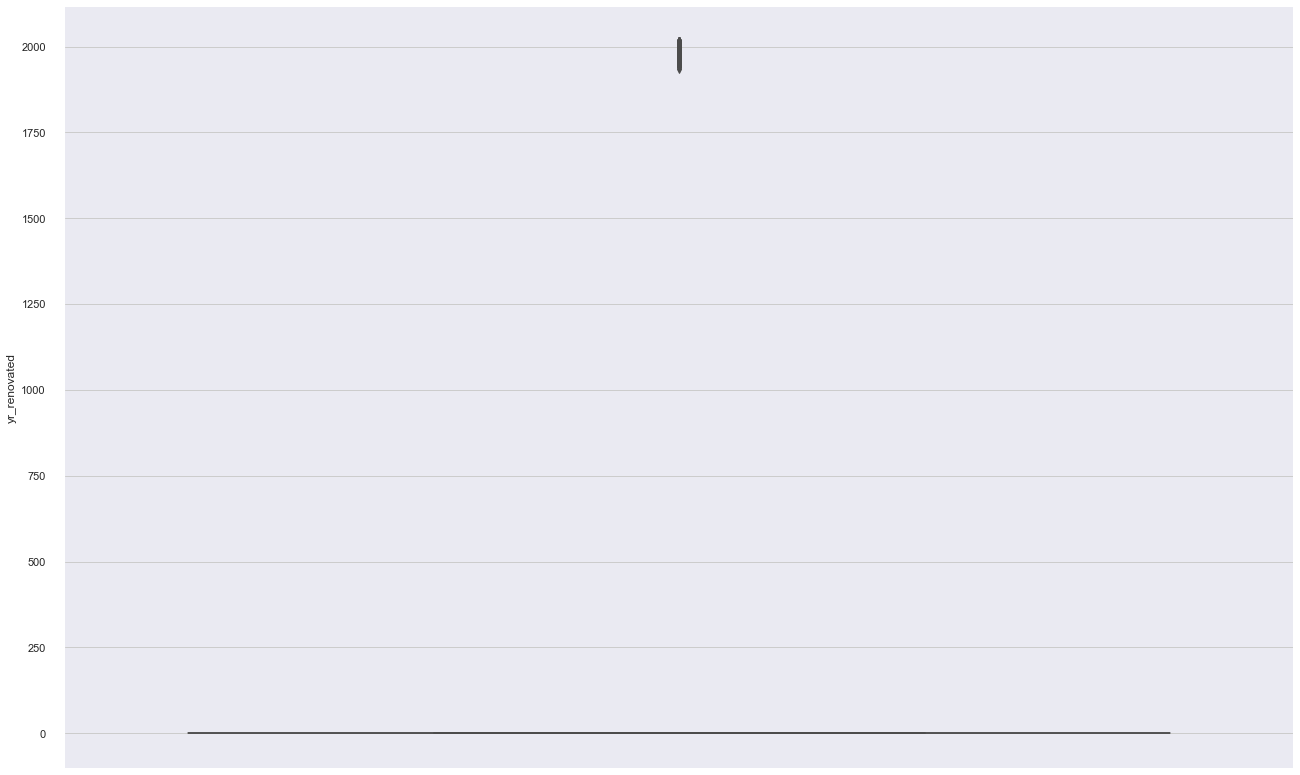

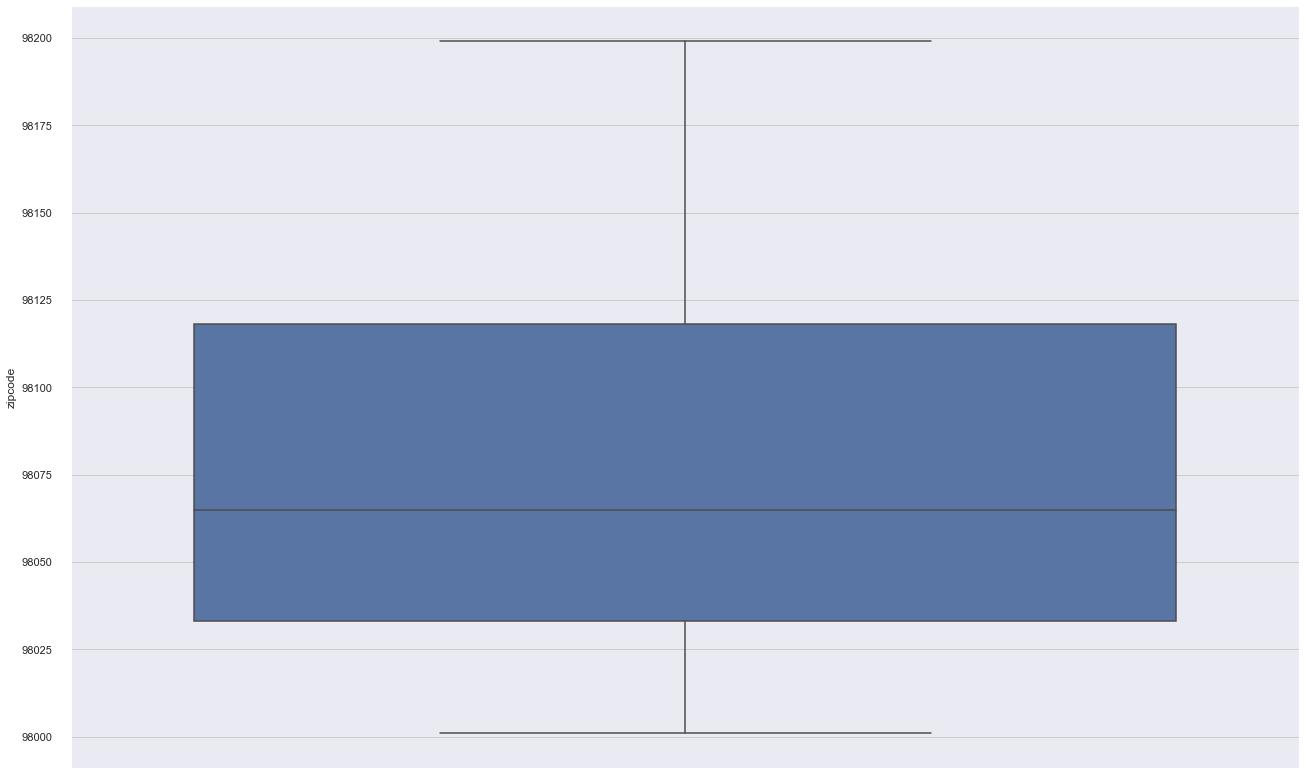

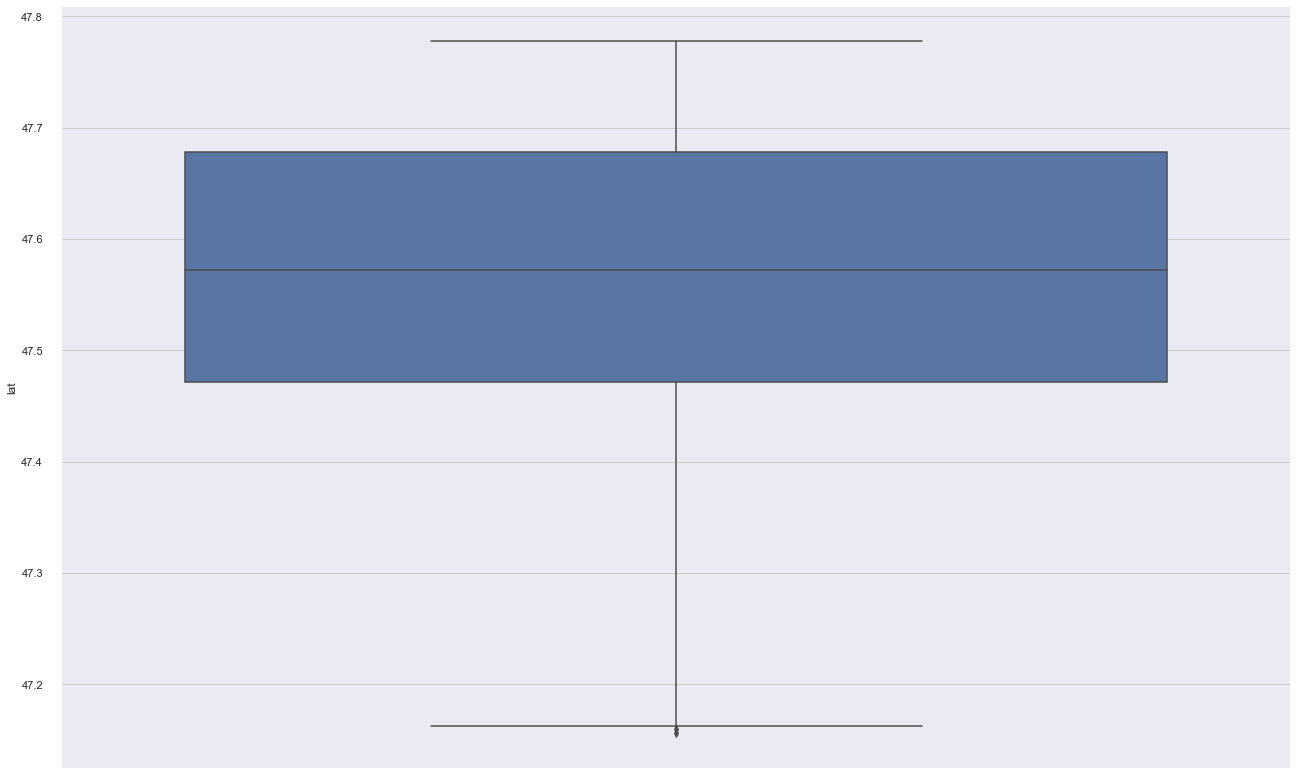

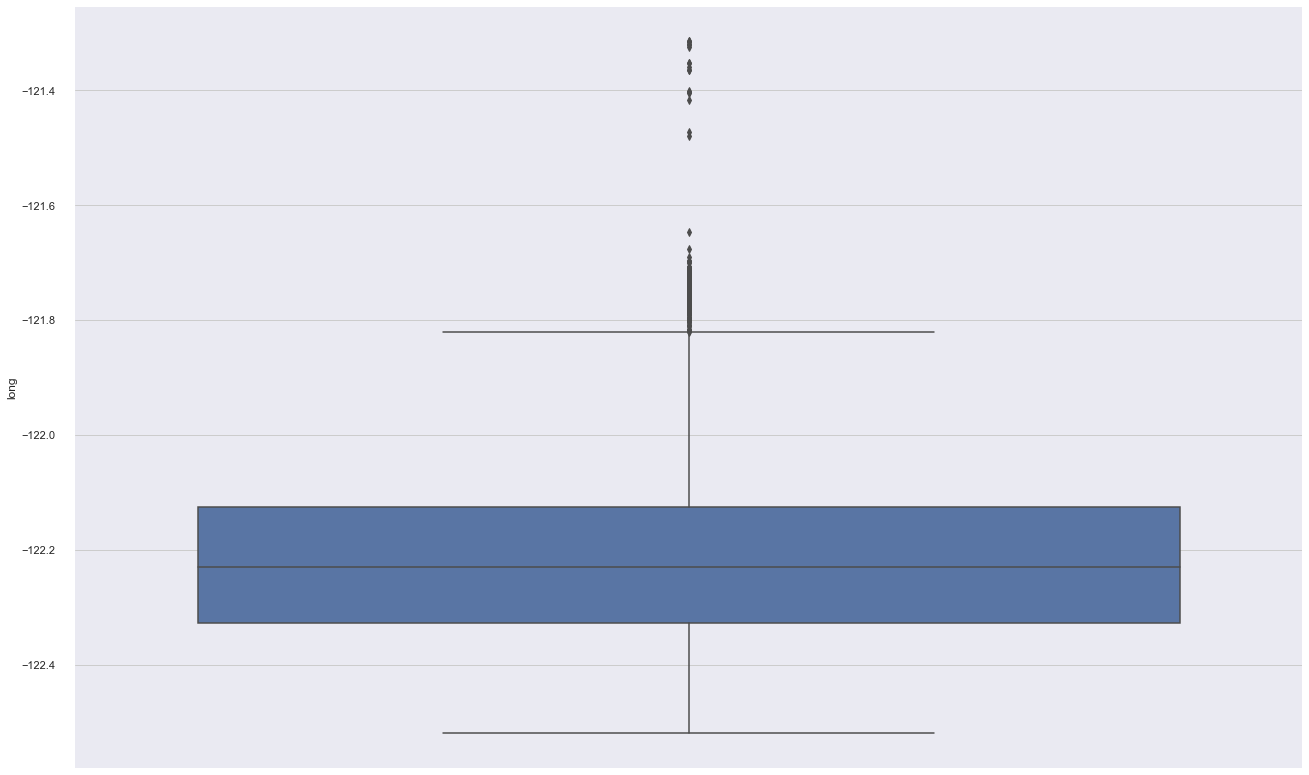

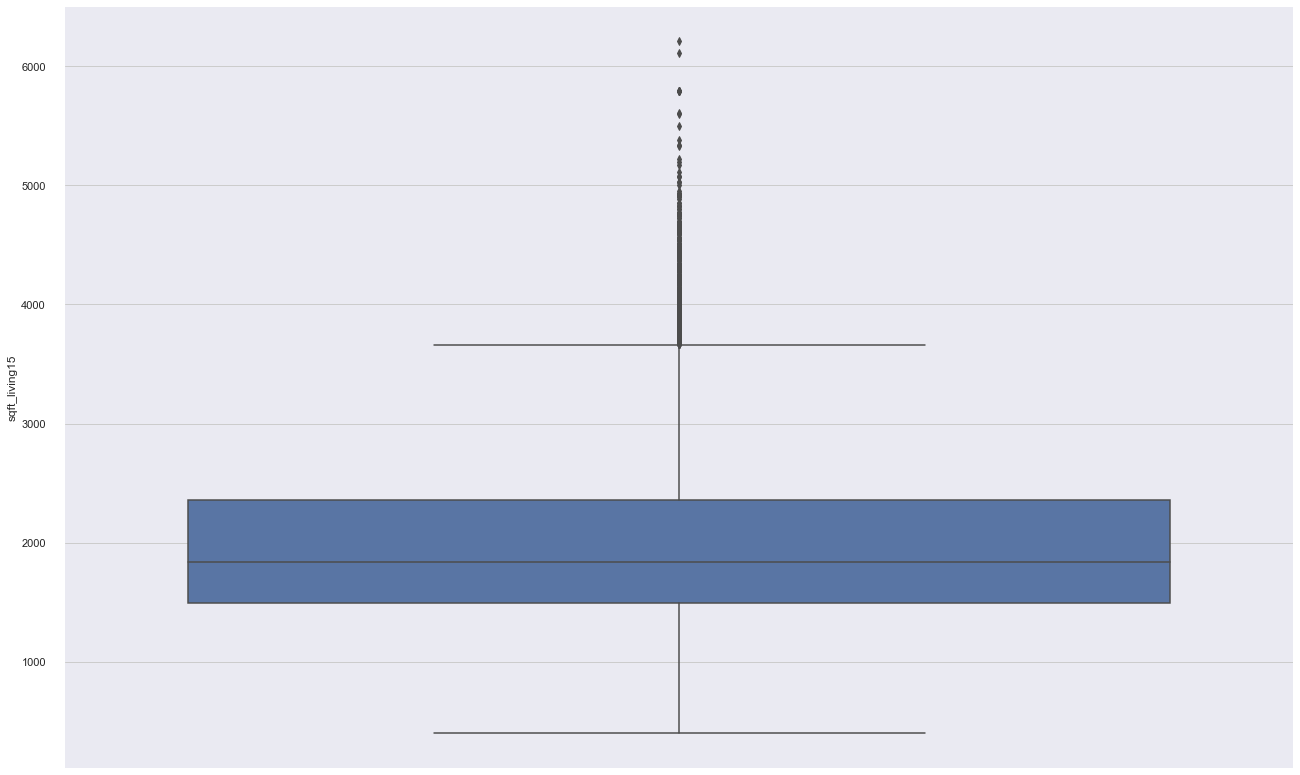

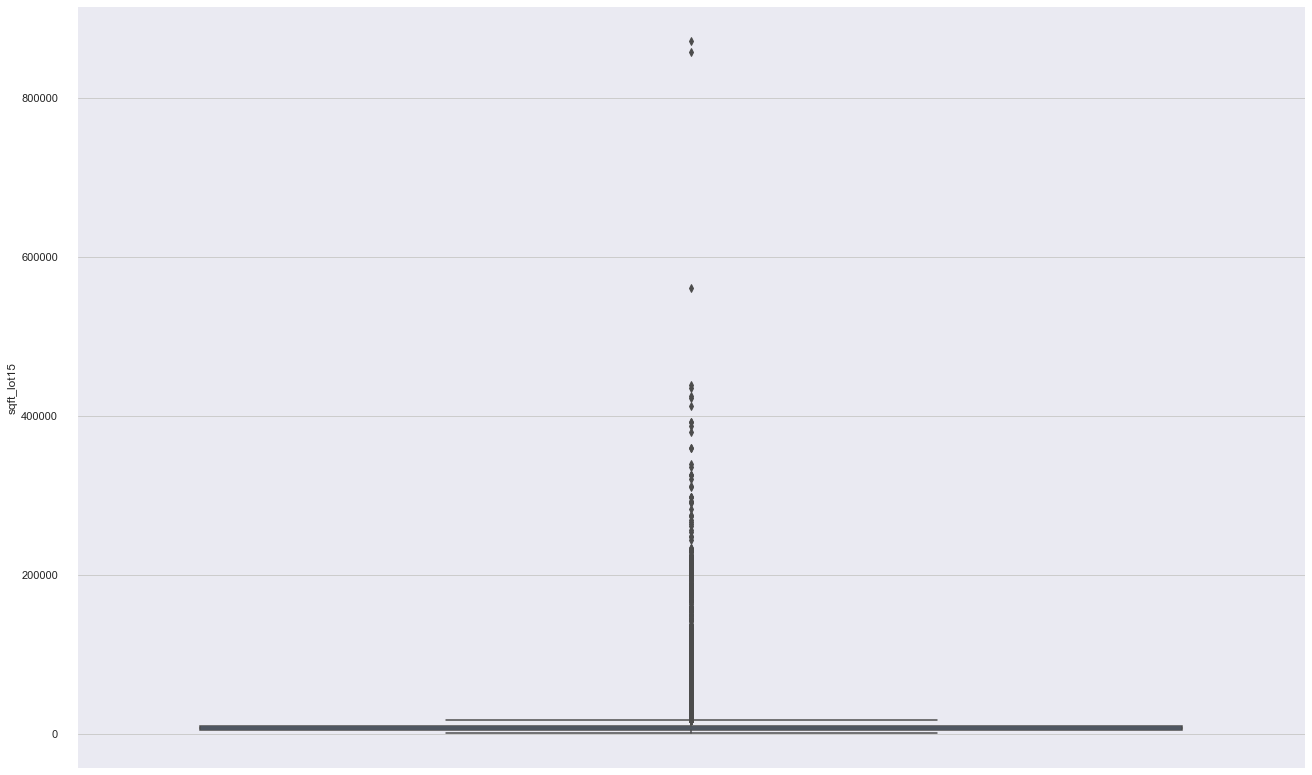

In [87]:
# looping through all the columns. Needs optimization.

for column in df.columns[3:]:  # Loop over all columns
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.boxplot(y=column, data=df)  # column is chosen here
    sns.despine(offset=10, trim=True) 
    fig.set_size_inches(22,14)

In [131]:
# identifying outliers using the interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id              5188962902.25
price               323000.00
bedrooms                 1.00
bathrooms                0.75
sqft_living           1120.00
sqft_lot              5647.75
floors                   1.00
waterfront               0.00
view                     0.00
condition                1.00
grade                    1.00
sqft_above            1020.00
sqft_basement          560.00
yr_built                46.00
yr_renovated             0.00
zipcode                 85.00
lat                      0.21
long                     0.20
sqft_living15          870.00
sqft_lot15            4983.00
dtype: float64
